In [1]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# replace with load from postgres
data_df = pd.read_csv('FINALCOMBOUSER1.csv')
data_df

,user_id,latitude,longitude,smoker,drink_level,dress_perference,ambience,transport,marital_status,hijos,...,activity,color,weight,budget,height,placeid,rating,food_rating,service_rating,rcuisine
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,135051,1,1,2,American
1,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,135025,2,2,2,American
2,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,135033,1,1,1,American
3,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,135045,1,1,1,American
4,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,...,student,black,69,medium,1.77,135039,1,1,1,American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,U1137,22.144803,-100.944623,False,social drinker,formal,family,public,single,independent,...,student,blue,72,low,1.78,135085,2,1,2,Mexican
3240,U1137,22.144803,-100.944623,False,social drinker,formal,family,public,single,independent,...,student,blue,72,low,1.78,132951,2,2,2,Mexican
3241,U1138,22.152884,-100.939663,False,social drinker,formal,friends,public,single,independent,...,student,blue,54,medium,1.55,132925,1,2,1,Pizzeria
3242,U1138,22.152884,-100.939663,False,social drinker,formal,friends,public,single,independent,...,student,blue,54,medium,1.55,132922,2,2,2,Pizzeria


In [3]:
new_data_df = data_df.drop(["user_id", "latitude", "longitude", "placeid"], axis='columns')
new_data_df.head()

,smoker,drink_level,dress_perference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height,rating,food_rating,service_rating,rcuisine
0,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,2,American
1,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,2,2,2,American
2,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,American
3,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,American
4,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77,1,1,1,American


In [4]:
n = new_data_df.nunique(axis=0)
print(n)

smoker                2
drink_level           3
dress_perference      4
ambience              3
transport             3
marital_status        3
hijos                 3
birth_year           20
interest              5
personality           4
religion              5
activity              4
color                 8
weight               43
budget                3
height               37
rating                3
food_rating           3
service_rating        3
rcuisine            103
dtype: int64


In [5]:
cuisine = new_data_df['rcuisine']
cuisine.value_counts()

Mexican             728
American            102
Cafeteria            85
Cafe-Coffee_Shop     79
Family               69
                   ... 
Persian              14
Ethiopian            14
Romanian             14
Cambodian            14
Southern             14
Name: rcuisine, Length: 103, dtype: int64

In [6]:
clean_data_df = new_data_df.drop(["rcuisine"], axis='columns')

In [7]:
cleaned_data_df = pd.get_dummies(clean_data_df)
cleaned_data_df.head()

,smoker,birth_year,weight,height,rating,food_rating,service_rating,drink_level_abstemious,drink_level_casual drinker,drink_level_social drinker,...,color_blue,color_green,color_orange,color_purple,color_red,color_white,color_yellow,budget_high,budget_low,budget_medium
0,False,1989,69,1.77,1,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,False,1989,69,1.77,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,1989,69,1.77,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,1989,69,1.77,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,False,1989,69,1.77,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
print(list(cleaned_data_df.columns))

['smoker', 'birth_year', 'weight', 'height', 'rating', 'food_rating', 'service_rating', 'drink_level_abstemious', 'drink_level_casual drinker', 'drink_level_social drinker', 'dress_perference_elegant', 'dress_perference_formal', 'dress_perference_informal', 'dress_perference_no preference', 'ambience_family', 'ambience_friends', 'ambience_solitary', 'transport_car owner', 'transport_on foot', 'transport_public', 'marital_status_married', 'marital_status_single', 'marital_status_widow', 'hijos_dependent', 'hijos_independent', 'hijos_kids', 'interest_eco-friendly', 'interest_none', 'interest_retro', 'interest_technology', 'interest_variety', 'personality_conformist', 'personality_hard-worker', 'personality_hunter-ostentatious', 'personality_thrifty-protector', 'religion_Catholic', 'religion_Christian', 'religion_Jewish', 'religion_Mormon', 'religion_none', 'activity_professional', 'activity_student', 'activity_unemployed', 'activity_working-class', 'color_black', 'color_blue', 'color_gre

In [9]:
n = cleaned_data_df.nunique(axis=0)
print(n)

smoker                              2
birth_year                         20
weight                             43
height                             37
rating                              3
food_rating                         3
service_rating                      3
drink_level_abstemious              2
drink_level_casual drinker          2
drink_level_social drinker          2
dress_perference_elegant            2
dress_perference_formal             2
dress_perference_informal           2
dress_perference_no preference      2
ambience_family                     2
ambience_friends                    2
ambience_solitary                   2
transport_car owner                 2
transport_on foot                   2
transport_public                    2
marital_status_married              2
marital_status_single               2
marital_status_widow                2
hijos_dependent                     2
hijos_independent                   2
hijos_kids                          2
interest_eco

In [10]:
y = cleaned_data_df["rating"].values
X = cleaned_data_df.drop("rating", axis=1)

In [11]:
y

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [12]:
X

,smoker,birth_year,weight,height,food_rating,service_rating,drink_level_abstemious,drink_level_casual drinker,drink_level_social drinker,dress_perference_elegant,...,color_blue,color_green,color_orange,color_purple,color_red,color_white,color_yellow,budget_high,budget_low,budget_medium
0,False,1989,69,1.77,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,False,1989,69,1.77,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,False,1989,69,1.77,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,False,1989,69,1.77,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,False,1989,69,1.77,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,False,1989,72,1.78,1,2,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3240,False,1989,72,1.78,2,2,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3241,False,1991,54,1.55,2,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3242,False,1991,54,1.55,2,2,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9387587340731607
Testing Score: 0.87422934648582


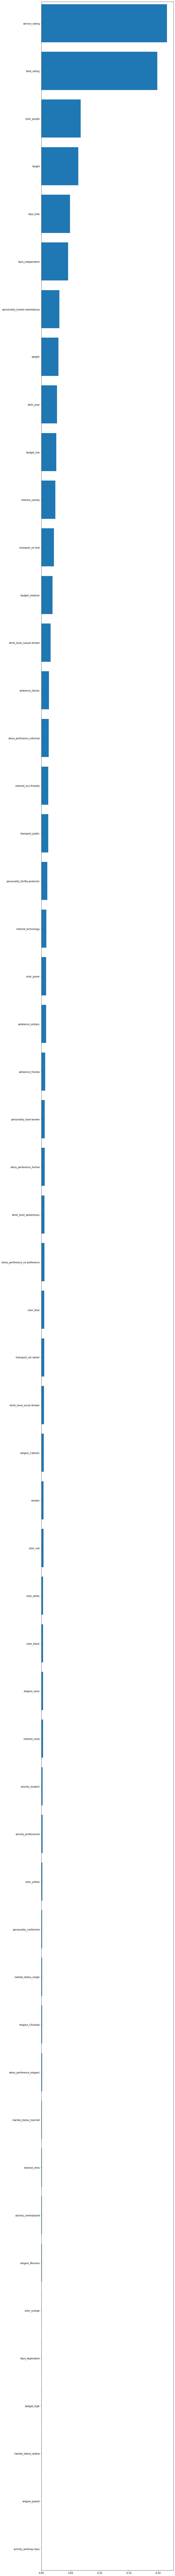

In [16]:
feature_importances = clf.feature_importances_
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
from sklearn.feature_selection import SelectFromModel

In [18]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True])

In [19]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [20]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5351418002466092
Testing Score: 0.5277435265104808


In [21]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8508014796547472
Testing Score: 0.8545006165228114
